In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.statespace.tools import diff
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [85]:
train=pd.read_csv(r"C:\Users\srika\Dropbox\PC\Downloads\DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv", parse_dates=['date']).set_index('date')
test=pd.read_csv(r"C:\Users\srika\Dropbox\PC\Downloads\DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv", parse_dates=['date']).set_index('date')
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [87]:
train.isna().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

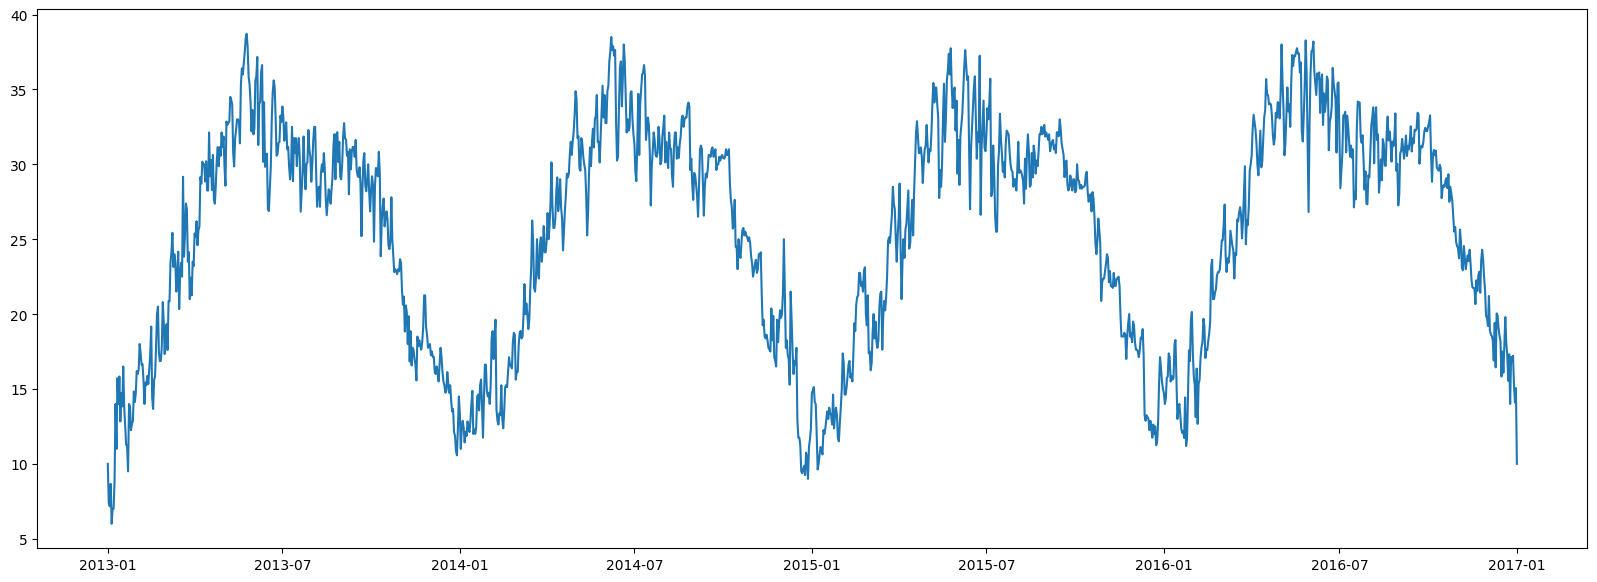

In [88]:
plt.figure(figsize=(20,7))
plt.plot(train.meantemp);

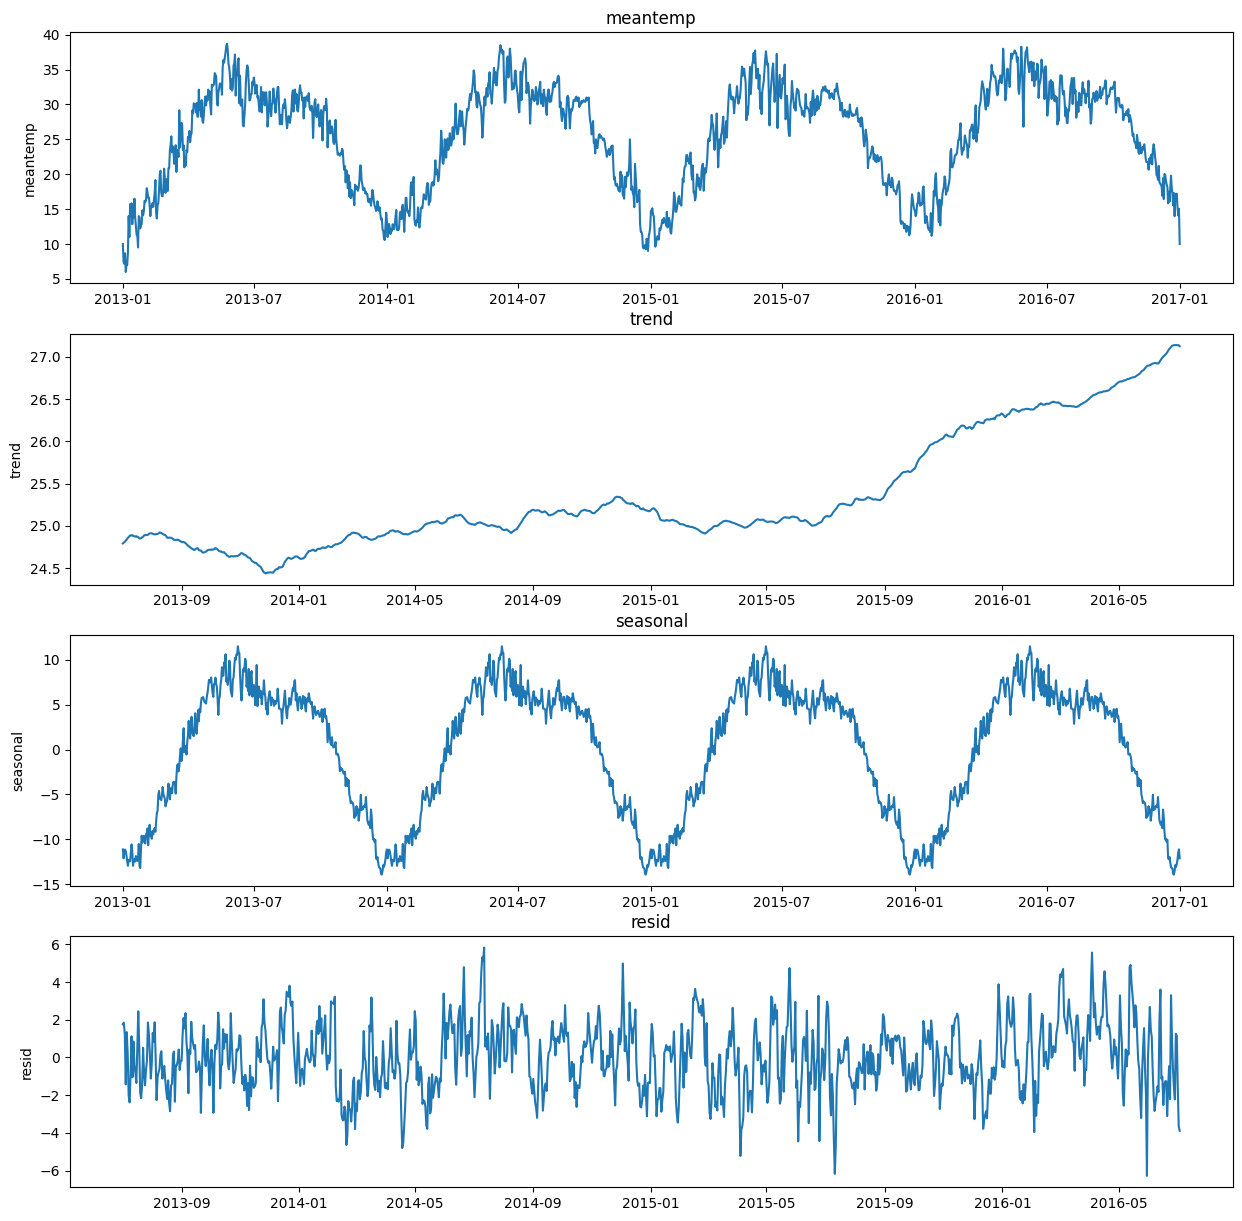

In [89]:
train.sort_index(inplace=True)
decomposition = seasonal_decompose(train['meantemp'], model='additive',period=365)

dtrnd=decomposition.trend
dsnl=decomposition.seasonal
drsd=decomposition.resid

a= [train['meantemp'],dtrnd,dsnl,drsd]

fig , axes =plt.subplots(4,1, figsize=(15,15))
for i ,ax in zip(a,axes.flatten()):
    ax.plot(i)
    ax.set_ylabel(i.name)
    ax.set_title(i.name)

In [90]:
train_m=train['meantemp']
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [91]:
train_monthly = train_m.resample('M').mean()
train_monthly.head()

date
2013-01-31    12.074770
2013-02-28    16.867560
2013-03-31    22.814209
2013-04-30    28.895119
2013-05-31    33.776767
Freq: M, Name: meantemp, dtype: float64

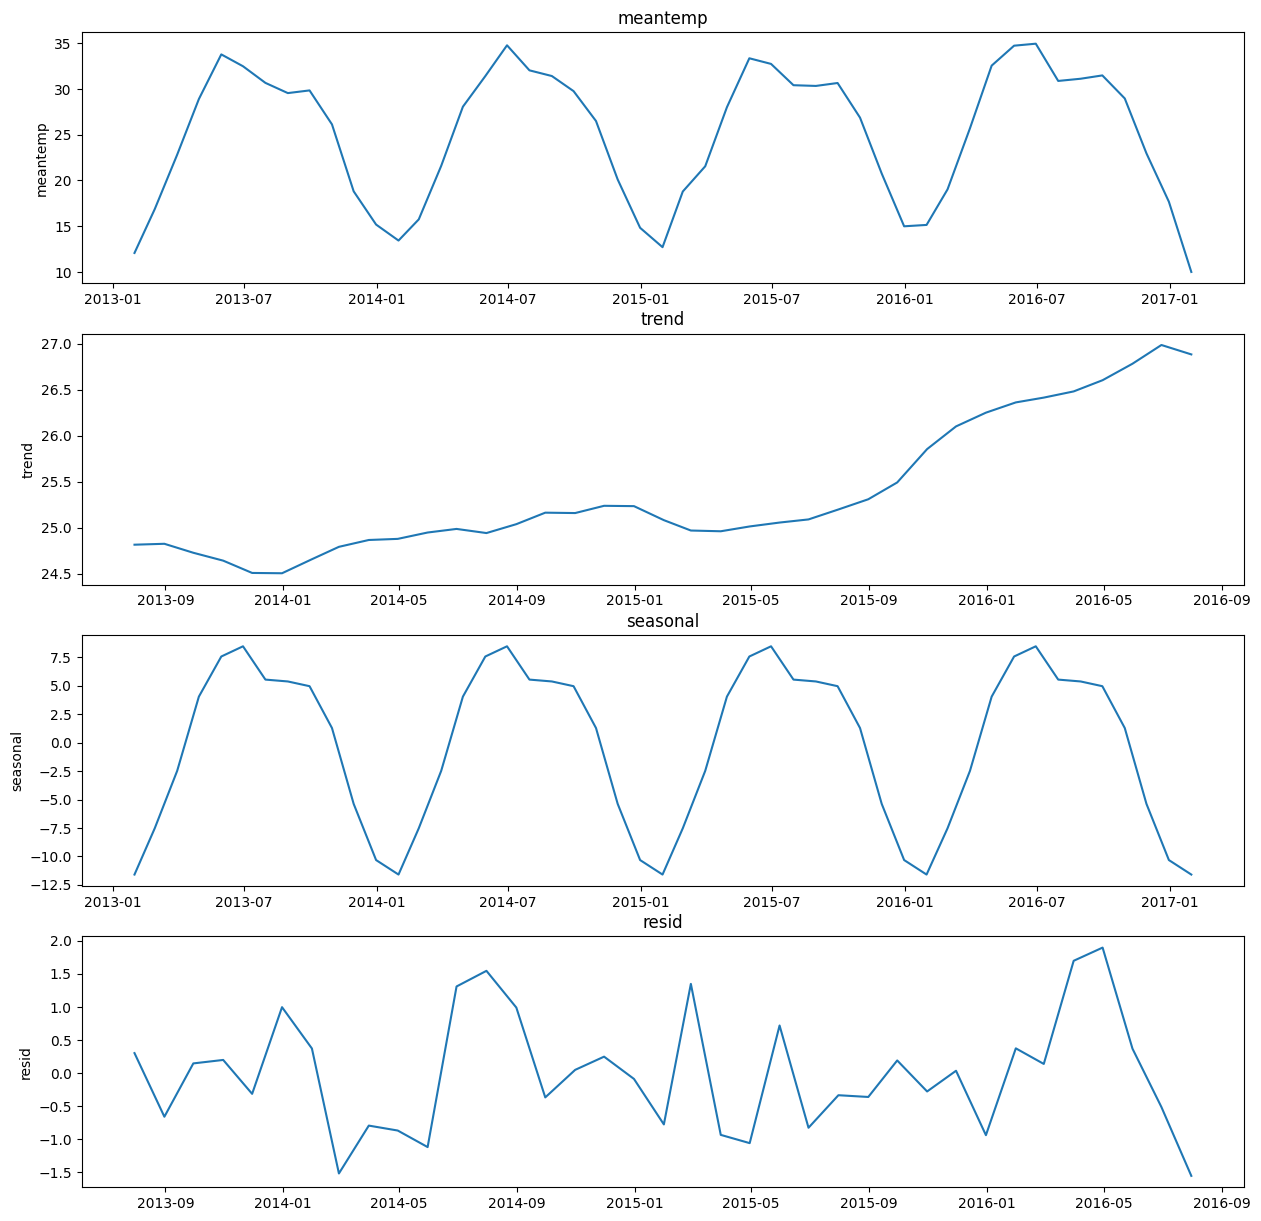

In [92]:
train_monthly.sort_index(inplace=True)
decomposition = seasonal_decompose(train_monthly, model='additive')

dtrnd=decomposition.trend
dsnl=decomposition.seasonal
drsd=decomposition.resid

a= [train_monthly,dtrnd,dsnl,drsd]

fig , axes =plt.subplots(4,1, figsize=(15,15))
for i ,ax in zip(a,axes.flatten()):
    ax.plot(i)
    ax.set_ylabel(i.name)
    ax.set_title(i.name)

In [93]:
model_daily = ExponentialSmoothing(train['meantemp'],trend='add',seasonal='add',seasonal_periods=30).fit()

Text(0.5, 1.0, 'Triple Exponent Smoothing')

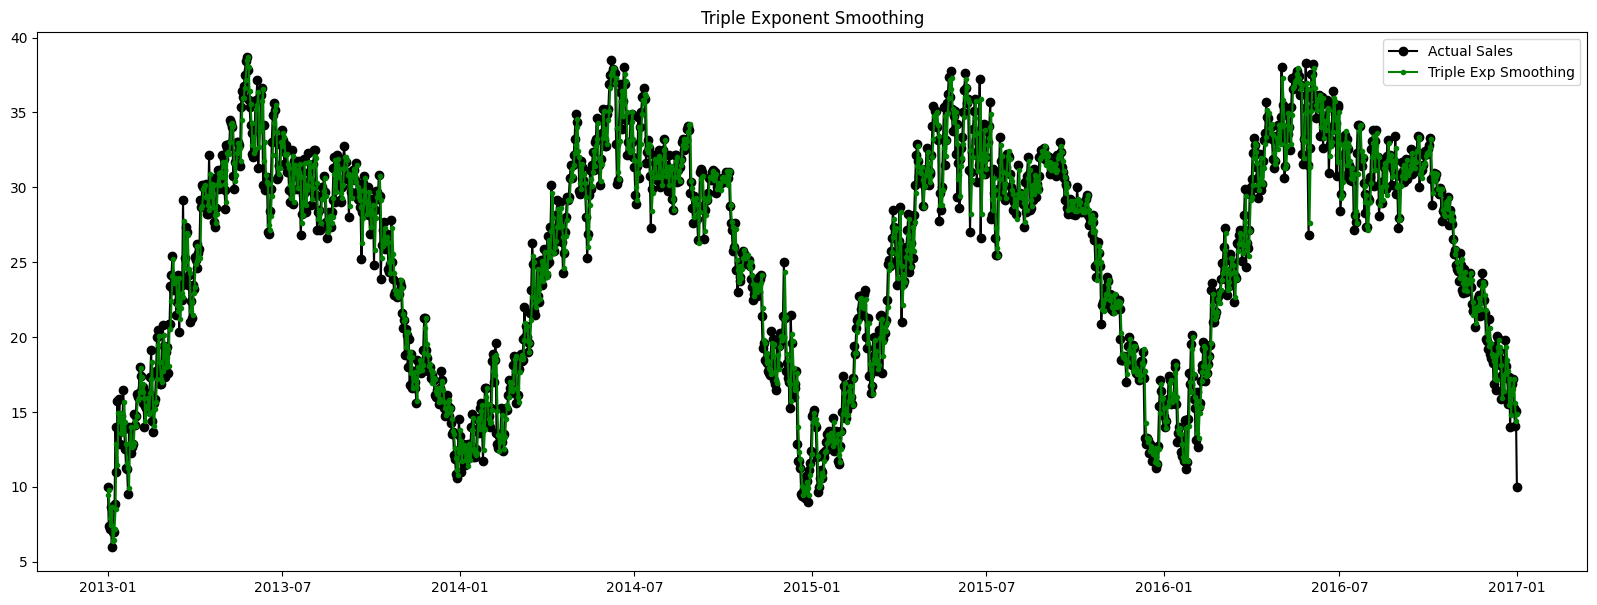

In [94]:
plt.figure(figsize=(20,7))
plt.plot(train['meantemp'], marker='o',color='black',label='Actual Sales')
plt.plot(model_daily.fittedvalues,marker='.',color='green',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

Text(0.5, 1.0, 'Triple Exponent Smoothing')

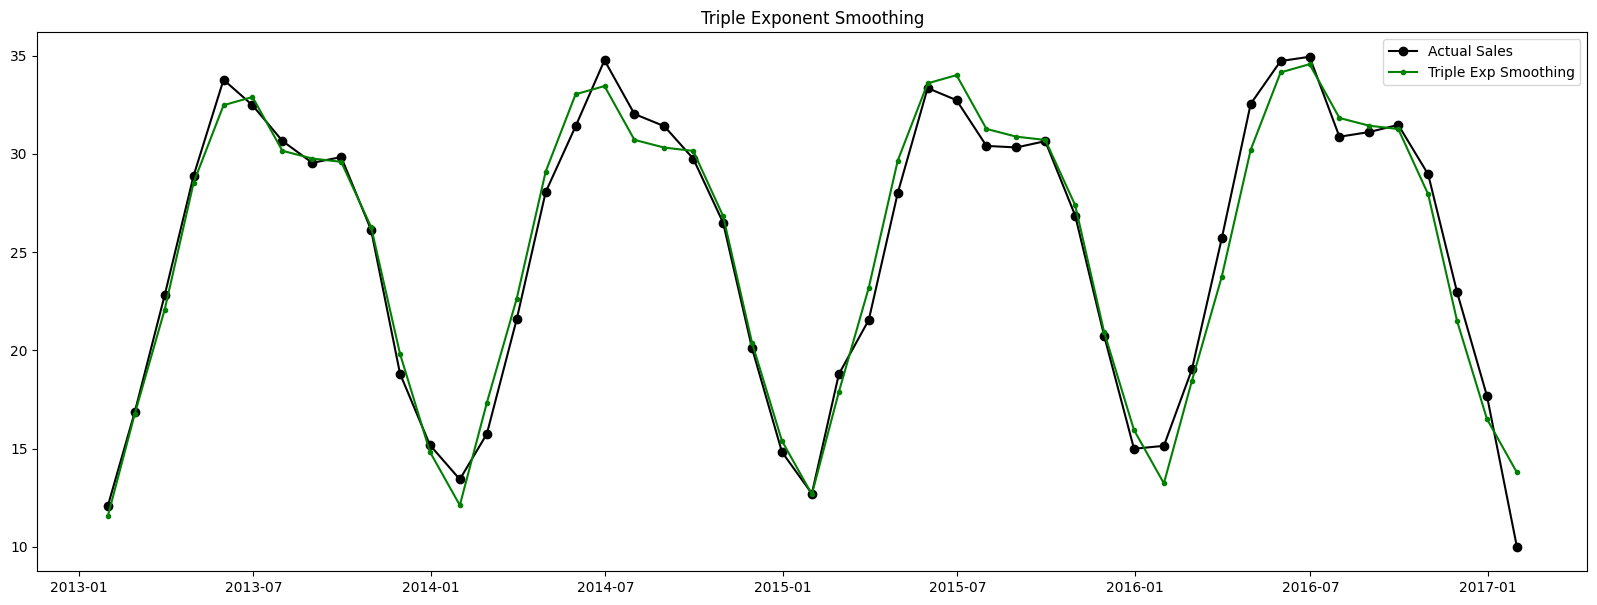

In [95]:
model = ExponentialSmoothing(train_monthly,trend='add',seasonal='add',seasonal_periods=12).fit()
plt.figure(figsize=(20,7))
plt.plot(train_monthly, marker='o',color='black',label='Actual Sales')
plt.plot(model.fittedvalues,marker='.',color='green',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

In [96]:
pvalue = adfuller(train['meantemp'])[1]

if(pvalue>0.05):
    print('p-value={}. Data is not stationary'.format(pvalue))
else:
    print('p-value={}. Data is stationary'.format(pvalue))

p-value=0.27741213723016056. Data is not stationary


In [97]:
train['diff'] = diff(train['meantemp'],k_diff=1)#d = 1
test['diff'] = diff(test['meantemp'],k_diff=1) #d = 1
test.dropna(inplace=True)
train.dropna(inplace=True)
train.head()

,meantemp,humidity,wind_speed,meanpressure,diff
date,,,,,
2013-01-02,7.400000,92.000000,2.980000,1017.800000,-2.600000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667
2013-01-06,7.000000,82.800000,1.480000,1018.000000,1.000000


In [98]:
pvalue = adfuller(train['diff'])[1]

if(pvalue>0.05):
    print('p-value={}. Data is not stationary'.format(pvalue))
else:
    print('p-value={}. Data is stationary'.format(pvalue))

p-value=2.764863137594368e-29. Data is stationary


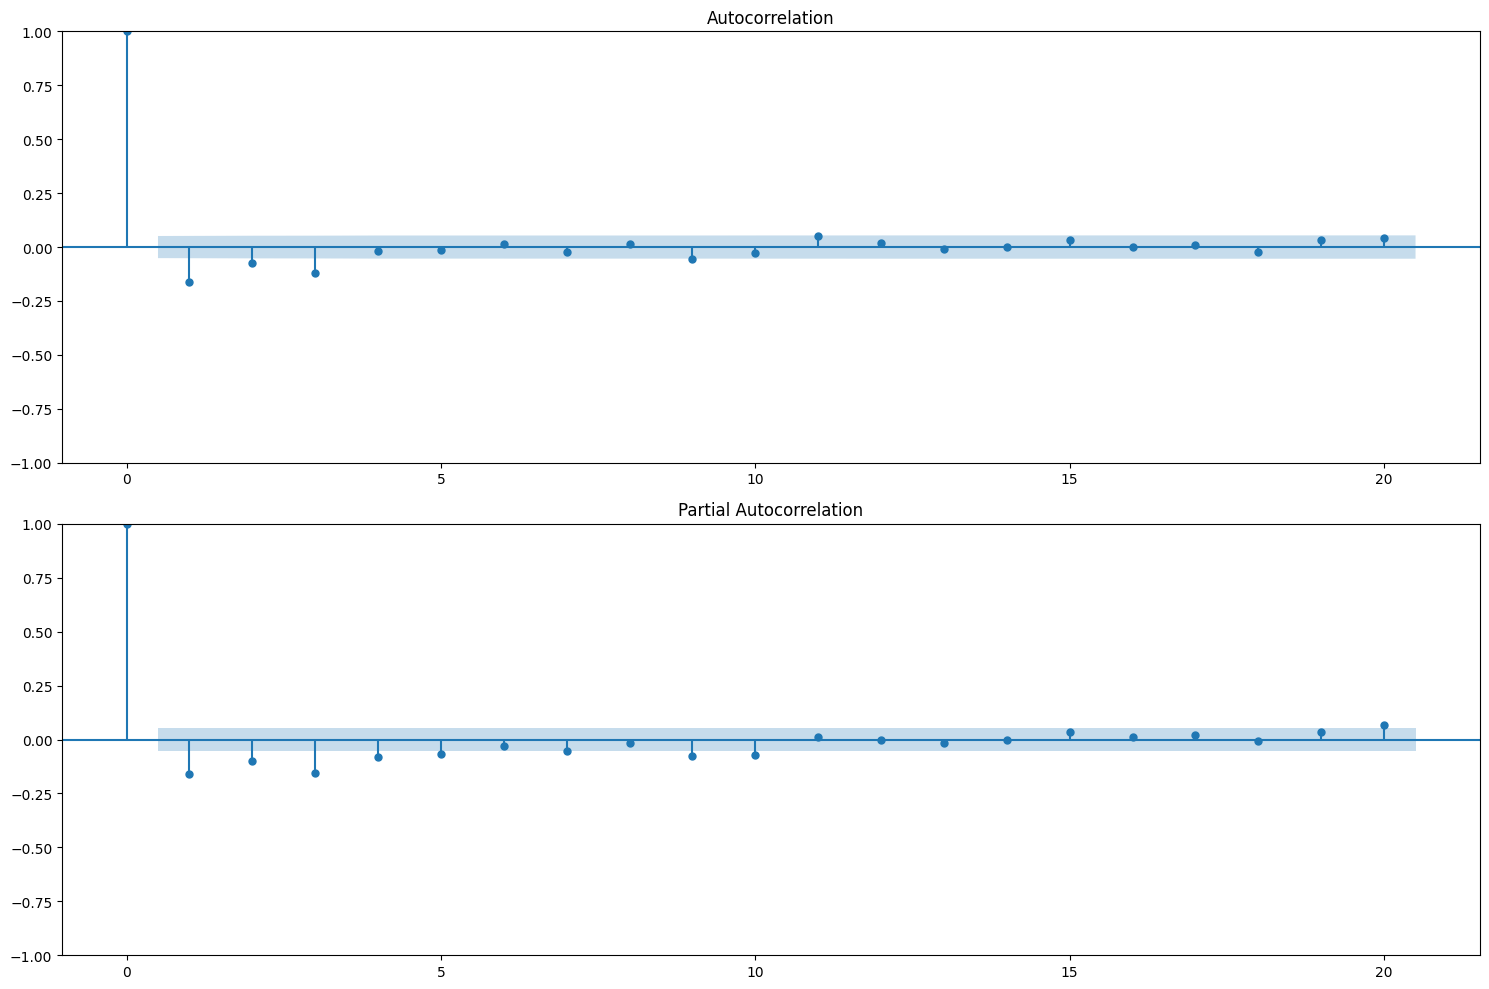

In [99]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(train['diff'], lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(train['diff'], lags=20, ax=ax2)

plt.tight_layout()

#### we got the value of P(5) and Q(3) `

### AR Model

In [100]:
ar_m1 = ARIMA(train['diff'],order=(5,0,0)).fit()

In [112]:
ar_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                 1461
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -2770.145
Date:                Mon, 26 Dec 2022   AIC                           5554.289
Time:                        17:14:30   BIC                           5591.297
Sample:                    01-02-2013   HQIC                          5568.094
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.026      0.087      0.930      -0.048       0.053
ar.L1         -0.2122      0.021     -9.896      0.000      -0.254      -0.170
ar.L2         -0.1525      0.024     -6.304      0.000      -0.200      -0.105
ar.L3         -0.1828      0.025     -7.224      0.000      -0.232      -0.133
ar.L4         -0.0950      0.024     -3.883      0.000      -0.143      -0.047
ar.L5         -0.0667      0.024     -2.837      0.005      -0.113      -0.021
sigma2         2.5964      0.074     34.854      0.000       2.450       2.742
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               277.34
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.48
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## MA Model

In [102]:
ma_M1 = ARIMA(train['diff'],order=(0,0,3)).fit()

In [103]:
ma_M1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                 1461
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -2766.246
Date:                Mon, 26 Dec 2022   AIC                           5542.492
Time:                        16:25:52   BIC                           5568.926
Sample:                    01-02-2013   HQIC                          5552.352
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.022      0.119      0.905      -0.040       0.045
ma.L1         -0.2262      0.022    -10.427      0.000      -0.269      -0.184
ma.L2         -0.1242      0.023     -5.350      0.000      -0.170      -0.079
ma.L3         -0.1523      0.026     -5.917      0.000      -0.203      -0.102
sigma2         2.5825      0.074     34.671      0.000       2.436       2.728
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               248.25
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.45
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
m1 = ARIMA(train['diff'],order=(5,0,3))
r1 = m1.fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                 1461
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -2750.463
Date:                Mon, 26 Dec 2022   AIC                           5520.926
Time:                        16:25:54   BIC                           5573.795
Sample:                    01-02-2013   HQIC                          5540.648
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.045      0.043      0.966      -0.086       0.090
ar.L1          0.7309      0.082      8.911      0.000       0.570       0.892
ar.L2          0.9455      0.131      7.230      0.000       0.689       1.202
ar.L3         -0.6774      0.057    -11.937      0.000      -0.789      -0.566
ar.L4         -0.0159      0.032     -0.494      0.621      -0.079       0.047
ar.L5          0.0058      0.029      0.200      0.841      -0.051       0.063
ma.L1         -0.9758      0.080    -12.256      0.000      -1.132      -0.820
ma.L2         -0.8996      0.149     -6.050      0.000      -1.191      -0.608
ma.L3          0.8870      0.073     12.128      0.000       0.744       1.030
sigma2         2.5314      0.073     34.684      0.000       2.388       2.674
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               338.50
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.56
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [105]:
predictions = r1.predict(len(train),len(train)+(len(test)-1))
predictions

2017-01-02    1.287860
2017-01-03    0.676768
2017-01-04    0.561770
2017-01-05    0.263987
2017-01-06    0.215866
                ...   
2017-04-20   -0.023045
2017-04-21   -0.023995
2017-04-22   -0.022067
2017-04-23   -0.022925
2017-04-24   -0.021125
Freq: D, Name: predicted_mean, Length: 113, dtype: float64

In [106]:
DF = pd.DataFrame({'Acctual':test['diff'],'Predicted':predictions,'Error': (test['diff']-predictions)}).dropna()
DF.head()

,Acctual,Predicted,Error
2017-01-02,2.586957,1.287860,1.299096
2017-01-03,-1.388889,0.676768,-2.065657
2017-01-04,1.588889,0.561770,1.027119
2017-01-05,-0.311111,0.263987,-0.575098
2017-01-06,0.929293,0.215866,0.713427


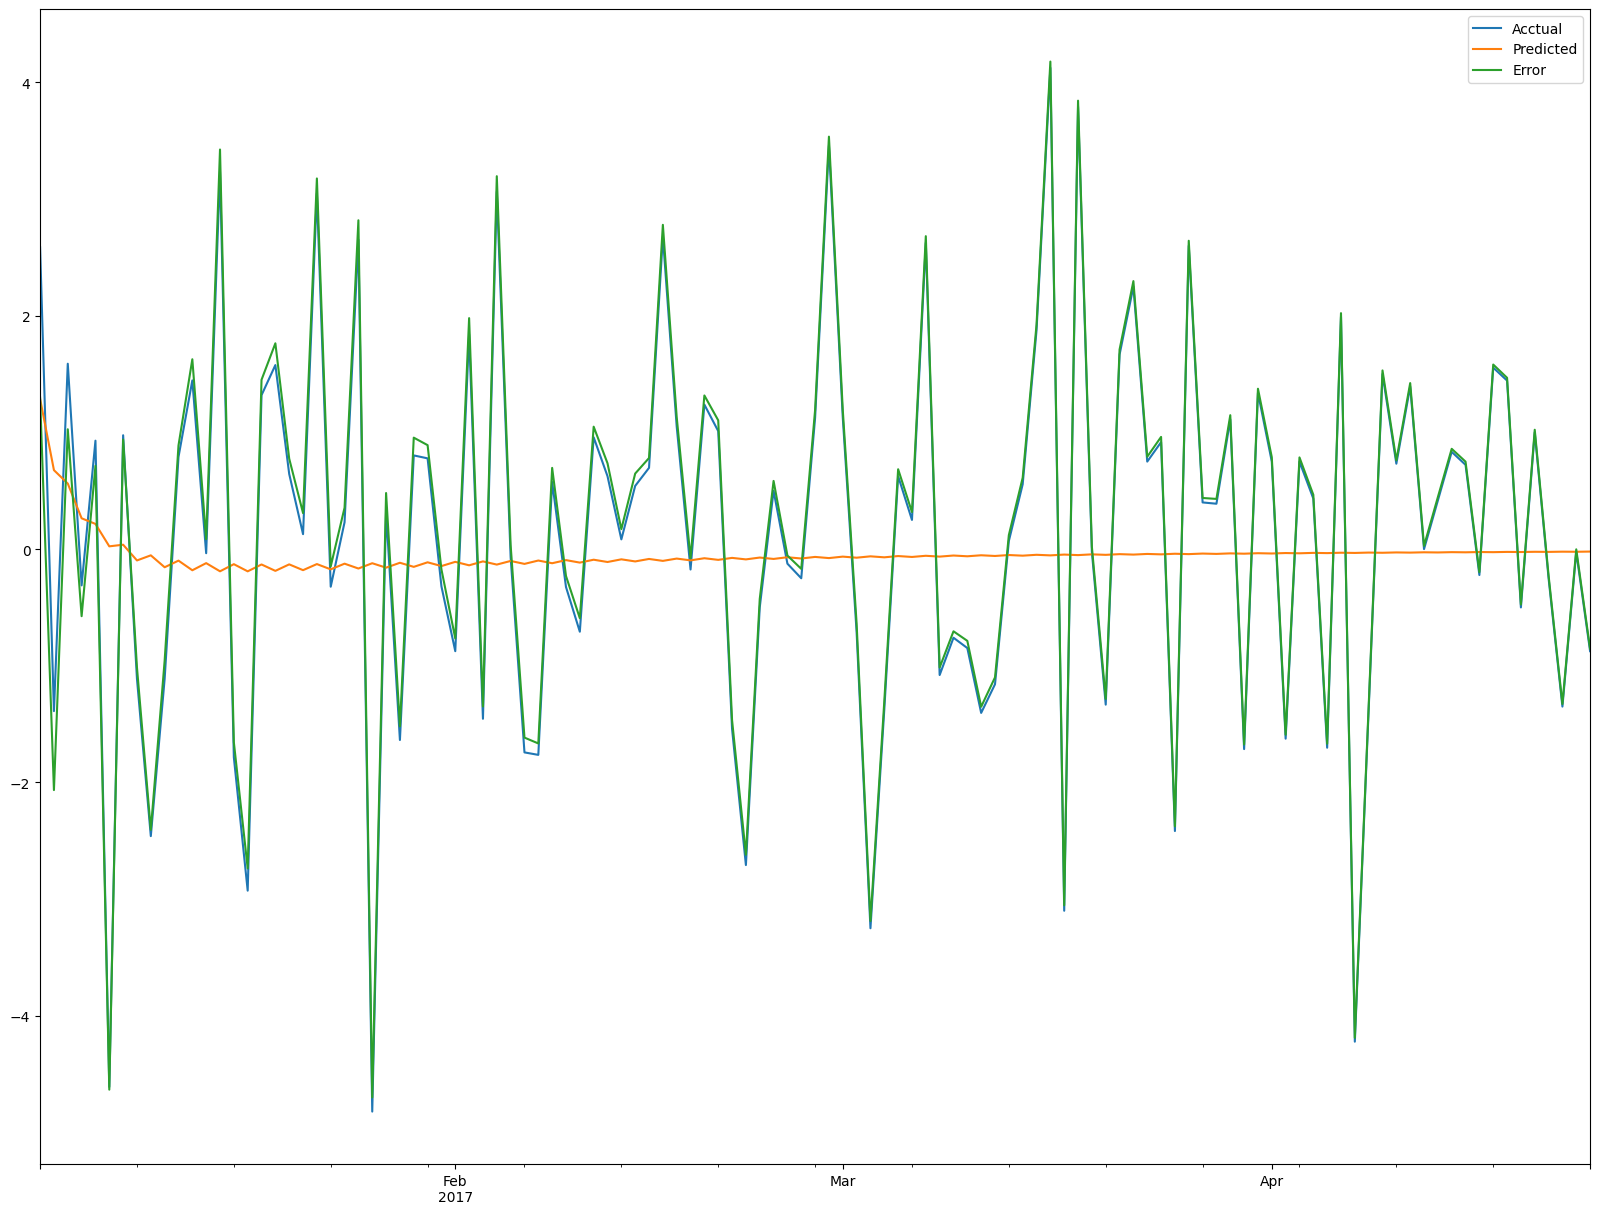

In [107]:
DF.plot(figsize=(20,15));

## LJung-Box test

In [108]:
pvalue = sm.stats.acorr_ljungbox(r1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [109]:
# MSE
msg = 'ARMA Model. Order=(' + str(5) + ',' + str(3) + ')'
mse1 = mean_squared_error(DF.Acctual, DF.Predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(5,3)
	MSE = 2.855607992694346
	RMSE = 1.6898544294389224
